In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

conv_base.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [4]:
base_dir = '/Users/l/Documents/MachineLearning/keras-playground/CatsVsDogs/small_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [22]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_feature(directory, sample_count) :
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return features, labels

In [24]:
train_features, train_labels = extract_feature(train_dir, 2000)
validation_features, validation_labels = extract_feature(validation_dir, 1000)
test_features, test_labels = extract_feature(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


保存一下这个feature和labels

In [26]:
np.save("train_featurs.npy",train_features)
np.save("train_labels.npy",train_labels)
np.save("validation_features.npy",validation_features)
np.save("validation_labels.npy", validation_labels)
np.save("test_features.npy",test_features)
np.save("test_labels.npy",test_labels)
#np.load(filename)   reload the numpy array

In [31]:
#把 features(sample_count, 4, 4, 512)展平后输出到Dense层
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [32]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5)) #添加一层dropout
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6030 - acc: 0.6620 - val_loss: 0.4284 - val_acc: 0.8450
Epoch 2/30
2000/2000 [==============================] - 2s 984us/step - loss: 0.4254 - acc: 0.8095 - val_loss: 0.3587 - val_acc: 0.8620
Epoch 3/30
2000/2000 [==============================] - 2s 945us/step - loss: 0.3512 - acc: 0.8510 - val_loss: 0.3147 - val_acc: 0.8840
Epoch 4/30
2000/2000 [==============================] - 2s 948us/step - loss: 0.3127 - acc: 0.8735 - val_loss: 0.2957 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 2s 951us/step - loss: 0.2809 - acc: 0.8845 - val_loss: 0.2797 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 2s 952us/step - loss: 0.2634 - acc: 0.9010 - val_loss: 0.2684 - val_acc: 0.9000
Epoch 7/30
2000/2000 [==============================] - 2s 971us/step - loss: 0.2492 - acc: 0.9040 - val_loss: 0.2622 - val_acc: 0.9000
Ep

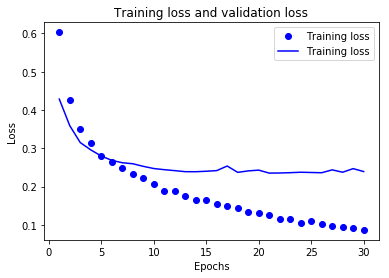

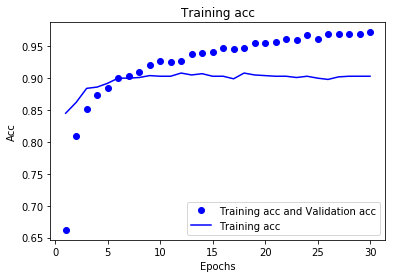

In [38]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(loss_value) +1)

plt.plot(epochs, train_loss, 'bo', label="Training loss")
plt.plot(epochs, validation_loss, 'b', label="Training loss")
plt.title('Training loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_acc= history_dict['acc']
validation_acc= history_dict['val_acc']
epochs = range(1, len(loss_value) +1)

plt.plot(epochs, train_acc, 'bo', label="Training acc and Validation acc")
plt.plot(epochs, validation_acc, 'b', label="Training acc")
plt.title('Training acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

两者结合最终准确率在90%左右